# Cat And Dog Classification



## Info About Dataset

This dataset is for running the code from this site: https://becominghuman.ai/building-an-image-classifier-using-deep-learning-in-python-totally-from-a-beginners-perspective-be8dbaf22dd8.

This is how to show a picture from the training set: display(Image('../input/cat-and-dog/trainingset/trainingset/dogs/dog.423.jpg'))

From the test set: display(Image('../input/cat-and-dog/testset/testset/cats/cat.4453.jpg'))

See an example of using this dataset. https://www.kaggle.com/tongpython/nattawut-5920421014-cat-vs-dog-dl

[Link To Dataset](https://www.kaggle.com/tongpython/cat-and-dog)

## 1. Imports

In [1]:
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import pathlib
import PIL
import os

## 2. Train-Test Split

In [2]:
data_dir = pathlib.Path('./training_set/training_set')

In [3]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8005 files belonging to 2 classes.
Using 6404 files for training.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8005 files belonging to 2 classes.
Using 1601 files for validation.


## 3. Visualizing Dataset

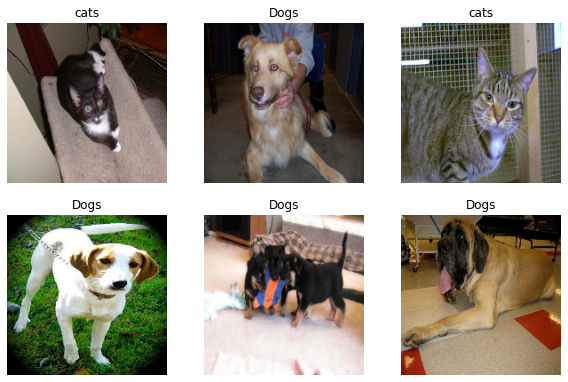

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title("cats" if not labels[i] else "Dogs")
        plt.axis("off")

## 4. Resnet50 Model

In [6]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

In [7]:
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(2, activation='softmax'))

In [8]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 24,637,826
Trainable params: 1,050,114
Non-trainable params: 23,587,712
_________________________________________________________________


## 5. MobilenetV2 Model

In [9]:
mobilenet_model = Sequential()

pretrained_model= tf.keras.applications.MobileNetV2(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

mobilenet_model.add(pretrained_model)
mobilenet_model.add(Flatten())
mobilenet_model.add(Dense(512, activation='relu'))
mobilenet_model.add(Dense(2, activation='softmax'))

In [10]:
mobilenet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                                 
 flatten_1 (Flatten)         (None, 1280)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               655872    
                                                                 
 dense_3 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 2,914,882
Trainable params: 656,898
Non-trainable params: 2,257,984
_________________________________________________________________


## 6. Checking GPU Availabilty

In [11]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

Num GPUs Available:  1
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2472685895491957102
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2252026676
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10859842135348035191
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1650 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


## 7. Training Resnet50 Model

In [12]:
resnet_model.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
201/201 [==============================] - 39s 151ms/step - loss: 0.1164 - accuracy: 0.9552 - val_loss: 0.0943 - val_accuracy: 0.9619
Epoch 2/10
201/201 [==============================] - 30s 147ms/step - loss: 0.0605 - accuracy: 0.9758 - val_loss: 0.0984 - val_accuracy: 0.9600
Epoch 3/10
201/201 [==============================] - 29s 146ms/step - loss: 0.0471 - accuracy: 0.9814 - val_loss: 0.0880 - val_accuracy: 0.9644
Epoch 4/10
201/201 [==============================] - 29s 146ms/step - loss: 0.0264 - accuracy: 0.9923 - val_loss: 0.0851 - val_accuracy: 0.9675
Epoch 5/10
201/201 [==============================] - 29s 146ms/step - loss: 0.0188 - accuracy: 0.9972 - val_loss: 0.0890 - val_accuracy: 0.9650
Epoch 6/10
201/201 [==============================] - 29s 146ms/step - loss: 0.0132 - accuracy: 0.9988 - val_loss: 0.0886 - val_accuracy: 0.9675
Epoch 7/10
201/201 [==============================] - 29s 146ms/step - loss: 0.0088 - accuracy: 0.9995 - val_loss: 0.0870 - val_ac

## 8. Training MobilenetV2 Model

In [14]:
mobilenet_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history_m = mobilenet_model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
201/201 [==============================] - 17s 73ms/step - loss: 0.6596 - accuracy: 0.6716 - val_loss: 0.5642 - val_accuracy: 0.7027
Epoch 2/10
201/201 [==============================] - 14s 67ms/step - loss: 0.5399 - accuracy: 0.7270 - val_loss: 0.5738 - val_accuracy: 0.7039
Epoch 3/10
201/201 [==============================] - 14s 67ms/step - loss: 0.5099 - accuracy: 0.7450 - val_loss: 0.6367 - val_accuracy: 0.6802
Epoch 4/10
201/201 [==============================] - 14s 67ms/step - loss: 0.5030 - accuracy: 0.7498 - val_loss: 0.5326 - val_accuracy: 0.7358
Epoch 5/10
201/201 [==============================] - 14s 67ms/step - loss: 0.4718 - accuracy: 0.7659 - val_loss: 0.5380 - val_accuracy: 0.7420
Epoch 6/10
201/201 [==============================] - 14s 67ms/step - loss: 0.4535 - accuracy: 0.7780 - val_loss: 0.5303 - val_accuracy: 0.7470
Epoch 7/10
201/201 [==============================] - 14s 68ms/step - loss: 0.4362 - accuracy: 0.7881 - val_loss: 0.6881 - val_accuracy:

## 9. Visualizing Resnet50 Training Data

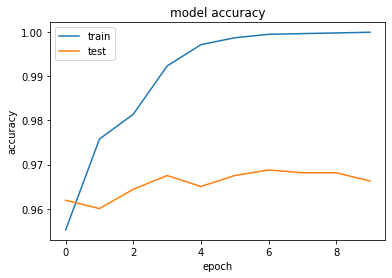

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

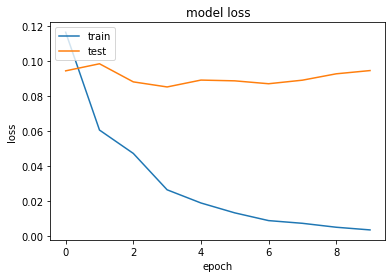

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 10. Visualizing MobilenetV2 Training Data

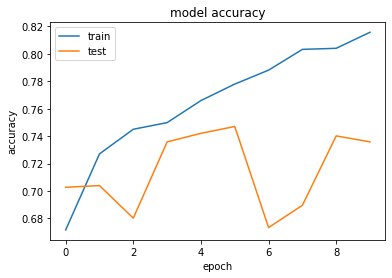

In [17]:
plt.plot(history_m.history['accuracy'])
plt.plot(history_m.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

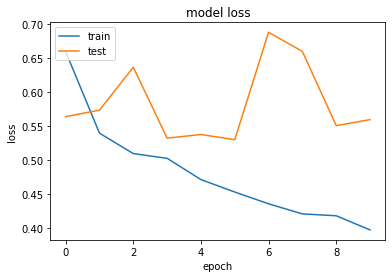

In [23]:
plt.plot(history_m.history['loss'])
plt.plot(history_m.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
model_json = resnet_model.to_json()
with open("resnet50.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
resnet_model.save_weights("resnet50.h5")
print("Saved model to disk")

C:\Users\stdnt\Desktop\Keras\venv\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Saved model to disk


In [19]:
model_json = mobilenet_model.to_json()
with open("mobilenet.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
mobilenet_model.save_weights("mobilenet.h5")
print("Saved model to disk")

Saved model to disk


In [32]:
from IPython.display import Image

def predict_img(model, img_path):
    image = tf.keras.preprocessing.image.load_img(img_path, target_size=(180, 180))
    image_p = tf.keras.preprocessing.image.img_to_array(image)
    image_p = image_p.reshape((1, image_p.shape[0], image_p.shape[1], image_p.shape[2]))
    image_p = tf.keras.applications.resnet.preprocess_input(image_p)
    pred = model.predict(image_p)
    pred_string = 'Cat' if pred[0][0] > 0.5 else 'Dog'
    print(f'Prediction is: {pred_string}\nConfidence is: {max(pred[0])}')
    return Image(filename=img_path) 

Prediction is: cat
Confidence is: 0.8414869904518127


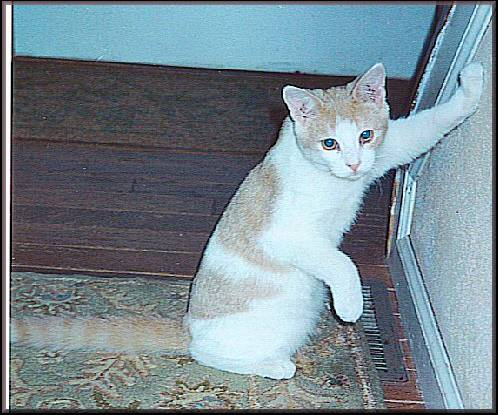

In [31]:
predict_img(resnet_model, './test_set/test_set/cats/cat.4001.jpg')